In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

According to Witzel'06 we should observe coherence as a function of total time of the experiment as follows:
\begin{equation}
\mathcal{L}_{\pm}~=~\exp\left(-\left(\frac{2t}{\tau}\right)^4\right)
\end{equation}
where $t$ is total duration of the experiment
In my simulation, this is true, nevertheless, the time constants $\tau(l_0,z_0)$ for a given size of a quantum dot is different and seems to scale with the size...
Therefore, on the following plots, there is a variable parameter $a$ which multiplies the time constant $\tau(l_0,z_0)~\rightarrow~a\tau(l_0,z_0)$ to see the overall behaviour:
\begin{equation}
\mathcal{L}^{res}_{\pm}~=~\exp\left(-\left(\frac{2t}{a\tau}\right)^4\right)
\end{equation}

Plots below show the decoherence curves from Witzel'06 as red dashed line, whereas black full circles (CCE-2) represents exact numerical results obtained from the currently developed version of the code and red full circles (CCE-2 MC) are calculated using the above code with additional Monte-Carlo method choosing only 1% of clusters considered in the code calculating exact results and then taking a 100-th power to obtain full coherence. Monte-Carlo results show remarkable accuracy when looking at different QD parameters, whereas the agreement with Witzel'06 still remains a subject of discussion...

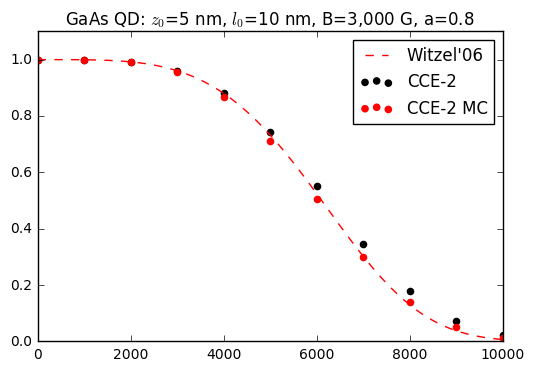

In [9]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z05_l0_10_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,10000,11)
time1=np.linspace(0,10000,101)
for i in range(1,3):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(1,3):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=5 nm, $l_0$=10 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_5_B100.dat")
l0=10
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
print(Witzel06[FD_rad,0])
a="cce-2_GaAs_z05_l0_10_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,10000,11)
time1=np.linspace(0,10000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(b.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=5 nm, $l_0$=10 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,2],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,10000)
interact(plt10, a=(0.8,0.9,0.001))

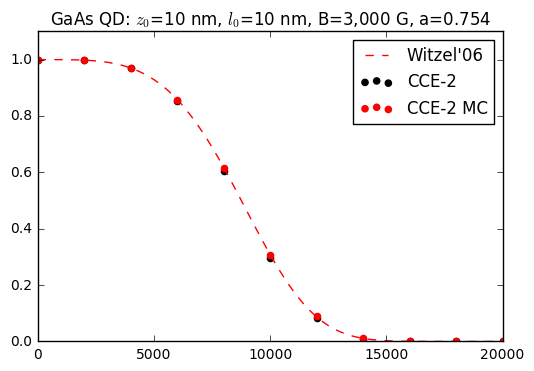

In [10]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z10_l0_10_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,20000,11)
time1=np.linspace(0,20000,101)
for i in range(1,3):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(1,3):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=10 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_10_B100.dat")
l0=10
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
print(Witzel06[FD_rad,0])
a="cce-2_GaAs_z10_l0_10_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,20000,11)
time1=np.linspace(0,20000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(b.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=10 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,2],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,20000)
interact(plt10, a=(0.7,0.9,0.001))

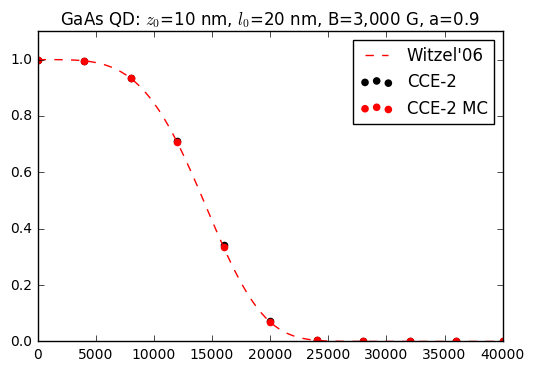

In [11]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z10_l0_20_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,40000,11)
time1=np.linspace(0,40000,101)
for i in range(1,3):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(1,3):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=20 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_10_B100.dat")
l0=20
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
print(Witzel06[FD_rad,0])
a="cce-2_GaAs_z10_l0_20_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,40000,11)
time1=np.linspace(0,40000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(c.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=20 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,2],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,40000)
interact(plt10, a=(0.7,0.9,0.001))

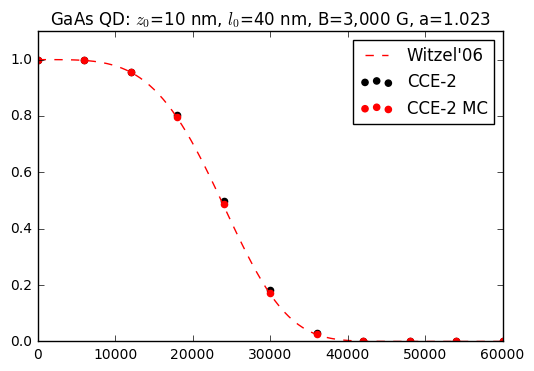

In [12]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z10_l0_40_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(2):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(2):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=40 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_10_B100.dat")
l0=40
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
print(Witzel06[FD_rad,0])
a="cce-2_GaAs_z10_l0_40_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(c.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=40 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,1],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,60000)
interact(plt10, a=(1,2.5,0.001))

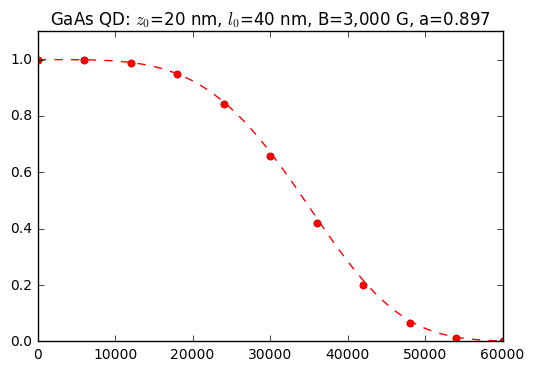

In [13]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z20_l0_40_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(2):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(2):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=20 nm, $l_0$=40 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_20_B100.dat")
l0=40
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
print(Witzel06[FD_rad,0])
a="cce-2_GaAs_z20_l0_40_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(2):
    for j in range(len(b.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(b.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=20 nm, $l_0$=40 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,1],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    #plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,60000)
interact(plt10, a=(0.5,1,0.001))

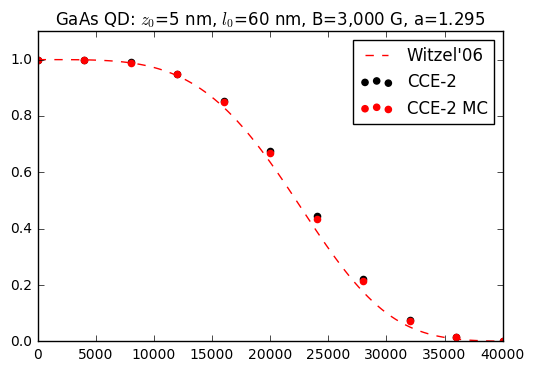

In [14]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z05_l0_60_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,40000,11)
time1=np.linspace(0,40000,101)
for i in range(1,3):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(1,3):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=5 nm, $l_0$=60 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_5_B100.dat")
l0=60
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
#print(Witzel06[FD_rad,0],Witzel06[FD_rad,1])
a="cce-2_GaAs_z05_l0_60_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,40000,11)
time1=np.linspace(0,40000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(c.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=5 nm, $l_0$=60 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,2],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,40000)
interact(plt10, a=(0.5,1.5,0.001))

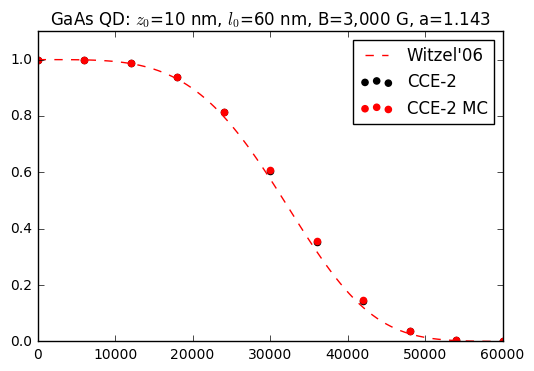

In [15]:
from IPython.html.widgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
a="cce-2_GaAs_z10_l0_60_newlattice.dat"
b=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(1,3):
    for j in range(len(b.loc[:,i])):
        b.set_value(j,i,eval(b.loc[j,i]))
for i in range(1,3):
    for j in range(len(b.ix[:,i])):
        b.set_value(j,i,abs(complex(b.ix[j,i][0],b.ix[j,i][1])))
    #print(b.ix[:,i])
plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=60 nm, B=3,000 G")
#plt.plot(time,b.ix[:,0],color="green",label="CCE-1")
#plt.plot(time,b.ix[:,1],color="red",label=r"CCE-2 MC 1$\%$")
#plt.plot(time,b.ix[:,2],color="blue",ls="--",label="CCE-3")
#plt.plot(time,b.ix[:,3],color="magenta",label="CCE-2 anal")
plt.ylim(-0.1,1.1)

Witzel06=np.loadtxt("Witzel06_GaAs_decoh_z0_10_B100.dat")
l0=60
FD_rad=np.argmin(np.abs(Witzel06[:,0]-l0*np.ones(len(Witzel06[:,0]))))
#print(Witzel06[FD_rad,0],Witzel06[FD_rad,1])
a="cce-2_GaAs_z10_l0_60_newlattice_MC.dat"
c=pd.read_csv(a,delimiter="\t",header=None)
time=np.linspace(0,60000,11)
time1=np.linspace(0,60000,101)
for i in range(2):
    for j in range(len(c.loc[:,i])):
        c.set_value(j,i,eval(c.loc[j,i]))
for i in range(2):
    for j in range(len(c.ix[:,i])):
        c.set_value(j,i,abs(complex(c.ix[j,i][0],c.ix[j,i][1])))
def plt10(a):
    plt.title(r"GaAs QD: $z_0$=10 nm, $l_0$=60 nm, B=3,000 G, a="+str(a))
    Witzel_decoh=np.exp(-(time1/(a*Witzel06[FD_rad,1]*1000))**4)
    plt.plot(time1, Witzel_decoh, 'r--',label=r"Witzel'06")
    #plt.plot(time,b.ix[:,0],color="blue",label="CCE-1 MC")
    plt.scatter(time,b.ix[:,2],color="black",label="CCE-2")
    plt.scatter(time,c.ix[:,1],color="red",label="CCE-2 MC")
    plt.legend()
    plt.ylim(0.0,1.1)
    plt.xlim(0,60000)
interact(plt10, a=(0.5,1.5,0.001))